In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#encode the data set and import it notebook
Data = pd.read_csv("C:\\Users\\abhsihek\\Desktop\\data sets\\spam.csv",encoding ='latin1')

In [4]:
Data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
#drop the unwanted columns
df=Data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
#change the column name
df=df.rename(columns={'v1':'target','v2':'mail'})

In [8]:
#change the labbled data
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

In [9]:
df['target']=en.fit_transform(df['target'])

In [10]:
df

,target,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
#checkng the sun of null values
df.isnull().sum()

target    0
mail      0
dtype: int64

In [12]:
df.shape

(5572, 2)

In [13]:
df.describe()

,target
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [14]:
#checking the duplicates numbers
df.duplicated().sum()

403

In [15]:
#remove all duplicates prestent in the dataset
df=df.drop_duplicates(keep="first")

In [16]:
#checking again the sum of duplicates
df.duplicated().sum()

0

##Eda 

In [17]:
#value count counts the different values present in a columns
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

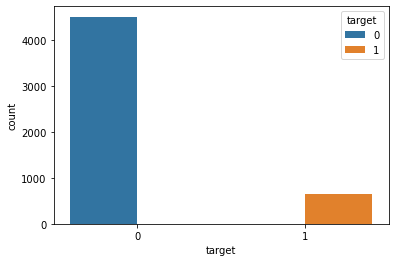

In [18]:
sns.countplot(x="target",hue="target",data=df)


([<matplotlib.patches.Wedge at 0x19f800ab1f0>,
 [Text(1.0144997251399075, -0.4251944351600248, 'ham'),
  Text(-1.014499764949479, 0.4251943401757038, 'spam')],
 [Text(0.5533634864399495, -0.2319242373600135, '87.4%'),
  Text(-0.5533635081542612, 0.23192418555038385, '12.6%')])

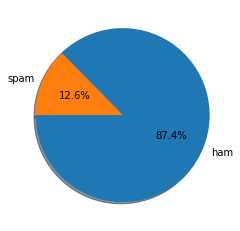

In [19]:
plt.pie(df['target'].value_counts(),labels=["ham","spam"],autopct="%1.1f%%",shadow=True, startangle=180)

In [20]:
import nltk
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [21]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhsihek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_char']=df['mail'].apply(len)

C:\Users\abhsihek\AppData\Local\Temp\ipykernel_3672\1130407567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['mail'].apply(len)


In [23]:
df

,target,mail,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [24]:
#number of words
df['num_words']=df['mail'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\abhsihek\AppData\Local\Temp\ipykernel_3672\4143168032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['mail'].apply(lambda x:len(nltk.word_tokenize(x)))


In [25]:
df.head()

,target,mail,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentence']=df['mail'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\abhsihek\AppData\Local\Temp\ipykernel_3672\2157117044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence']=df['mail'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [27]:
df.head()

,target,mail,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df.describe()

,target,num_char,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [29]:
#analyzing the ham and spam messages seprately

#form ham
df[df['target']==0].describe()

,target,num_char,num_words,num_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [30]:
#from spam
df[df['target']==1].describe()

,target,num_char,num_words,num_sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


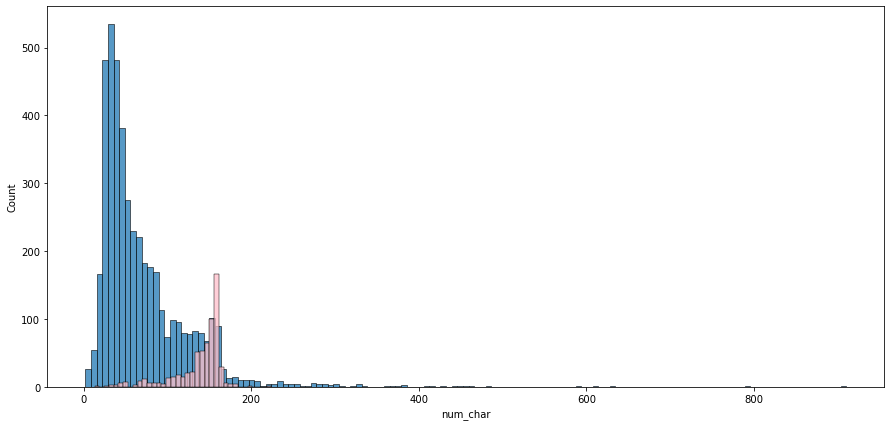

In [31]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='pink')
plt.show()

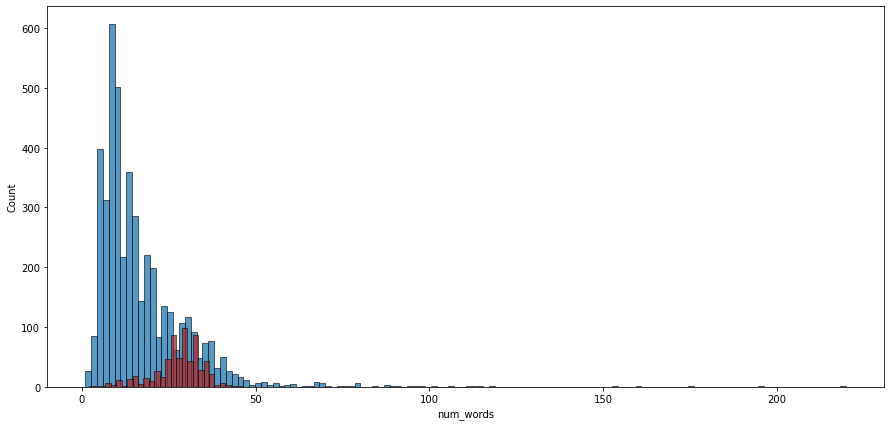

In [32]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='brown')
plt.show()

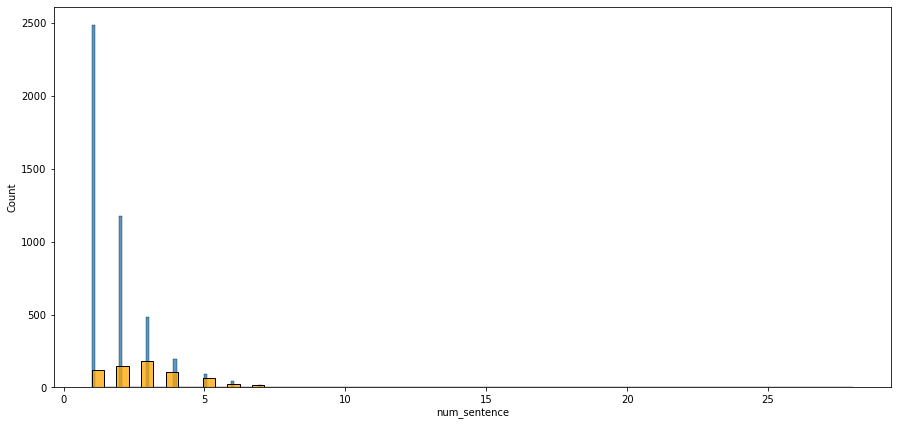

In [33]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'],color='orange')
plt.show()

In [34]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

In [ ]:
sns.heatmap(df.corr(),annot=True)

# '''
*tokenization
* remove special characte
* remove stop words and puncuation
*stop words are like is as the are....
*stemming
'''

In [ ]:
# import nltk
# nltk.download('stopwords')
# import string
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# ps=PorterStemmer()
# def transform_text(mail):
#     mail=mail.lower()
#     mail=nltk.word_tokenize(mail)
#     y=[]
#     for i in mail:
#         if i.isalnum():
#             y.append(i)
#             mail=y[:]
#             y.clear()
#             for i in mail:
#                 if i not in stopwords.words('english') and i not in string.punctuation:
#                     y.append(i)
#                     mail=y[:]
#                     y.clear()
#                     for i in mail:
#                         y.append(ps.stem(i))
#                     return " ".join(y)
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
df["transform"]=df['mail'].apply(transform_text)

In [ ]:
df

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud


In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')
spam_wc = wc.generate(df[df['target'] == 1]['transform'].str.cat(sep=" "))
plt.figure(figsize=(20,11))
plt.imshow(spam_wc)

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')
ham_wc = wc.generate(df[df['target'] == 0]['transform'].str.cat(sep=" "))
plt.figure(figsize=(20,11))
plt.imshow(ham_wc)

In [ ]:
#top words in ham and spam
df.head()

In [ ]:
  spam_corpus=[]
for msg in df[df['target']==1]['transform'].tolist():
    #split all the words
    for words in msg.split():
      
        spam_corpus.append(words)

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
y=Counter(spam_corpus).most_common(30)
#covert in data frame
z=pd.DataFrame(y)
z

In [ ]:
 ham_corpus=[]
for msg in df[df['target']==0]['transform'].tolist():
    #split all the words
    for words in msg.split():
      
        ham_corpus.append(words)
        y=Counter(ham_corpus).most_common(30)
#covert in data frame
z=pd.DataFrame(y)
z

# Model bulding using nb


In [ ]:
df['transform']

In [ ]:
#converting text into vectors
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
# X=cv.fit_transform(df['transform']).toarray()
X = tfidf.fit_transform(df['transform']).toarray()

In [ ]:
y=df['target'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [ ]:
gnb=GaussianNB()

In [ ]:
bnb=BernoulliNB()

In [ ]:
mnb=MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb.fit(X_train,y_train)


In [ ]:
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

In [ ]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

In [ ]:
#bnb performing better then remain both
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

In [ ]:
!pip install ensemble



In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting=VotingClassifier(estimators=[('kn',knc),('rf',rfc),('etc',etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [ ]:
# import pickle

In [ ]:
# pickle.dump(tfidf,open('vector.pkl','wb'))
# pickle.dump(mnb,open('model3.pkl','wb'))